<a href="https://colab.research.google.com/github/BillySiaga/Project2025/blob/main/SupervisedLearningCheckpoint_MicrosoftMalware_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SupervisedLearningCheckpoint_MicrosoftMalware_dataset
What You're Aiming For

In this checkpoint, we are going to work on the 'Microsoft Malware' dataset that was provided by Kaggle as part of the Microsoft Malware Prediction competition. This checkpoint will cover all the major concepts of supervised and unsupervised machine learning methods.

Dataset description : This dataset was derived from the original copy and simplified for learning purposes. It contains a set of machines, which run Microsoft Windows OS. The goal of this exercise is to predict a Windows machine’s probability of getting infected by various families of malware, based on different properties of that machine.

➡️ Dataset link

https://i.imgur.com/hv2Ynyn.jpg

➡️ Columns explanation


Instructions

Part1: supervised learning

Import you data and perform basic data exploration phase
Display general information about the dataset
Create a pandas profiling reports to gain insights into the dataset
Handle Missing and corrupted values
Remove duplicates, if they exist
Handle outliers, if they exist
Encode categorical features
Prepare your dataset for the modelling phase
Apply Decision tree, and plot its ROC curve
Try to improve your model performance by changing the model hyperparameters
Part2: unsupervised learning

Drop out the target variable
Apply K means clustering and plot the clusters
Find the optimal K parameter
Interpret the results

In [62]:
# Importing the neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing data and performing basic data exploration phase

In [63]:
#data importation and basic exploration
data = pd.read_csv("/content/Microsoft_malware_dataset_min.csv")
data.head(15)

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18
5,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,97
6,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,78
7,0,0.0,0.0,Core,1,1.0,0.0,1.0,rs1,97
8,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,164
9,1,1.0,0.0,CoreSingleLanguage,1,1.0,0.0,1.0,rs3,93


In [64]:
# data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                96585 non-null   float64
 2   Census_IsVirtualDevice      99815 non-null   float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    98924 non-null   float64
 6   SMode                       94068 non-null   float64
 7   IsProtected                 99609 non-null   float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB


In [65]:
data.describe(include = 'all')

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
count,100000.000000,96585.000000,99815.000000,100000,100000.000000,98924.000000,94068.000000,99609.000000,100000,100000.000000
unique,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,9,NaN
top,NaN,NaN,NaN,Core,NaN,NaN,NaN,NaN,rs4,NaN
freq,NaN,NaN,NaN,38727,NaN,NaN,NaN,NaN,43955,NaN
mean,0.499280,0.281607,0.006642,NaN,0.075850,0.977326,0.000351,0.944864,NaN,108.188050
std,0.500002,0.449785,0.081230,NaN,0.264759,0.148863,0.018727,0.228246,NaN,62.989406
min,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,1.000000
25%,0.000000,0.000000,0.000000,NaN,0.000000,1.000000,0.000000,1.000000,NaN,51.000000
50%,0.000000,0.000000,0.000000,NaN,0.000000,1.000000,0.000000,1.000000,NaN,97.000000
75%,1.000000,1.000000,0.000000,NaN,0.000000,1.000000,0.000000,1.000000,NaN,162.000000


In [66]:
#Overviewing the null values in the dataset
data.isnull().sum()

,0
HasDetections,0
Wdft_IsGamer,3415
Census_IsVirtualDevice,185
Census_OSEdition,0
Census_HasOpticalDiskDrive,0
Firewall,1076
SMode,5932
IsProtected,391
OsPlatformSubRelease,0
CountryIdentifier,0


# # Creating a pandas profiling reports to gain insights into the dataset

In [67]:
#Create a pandas profiling reports to gain insights into the dataset
! pip install ydata-profiling

In [68]:
#generating a profile report for the dataset
from ydata_profiling import ProfileReport
Profile = ProfileReport(data)
Profile.to_file(output_file = 'Profile.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:06<00:00,  1.55it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [69]:
#Handling missing and corrupted values in the dataset
#removing duplicates
duplicates = data.duplicated().sum()
print(duplicates)
#removing duplicates from the dataset
data.drop_duplicates(inplace = True)
print(data.info())



79581
<class 'pandas.core.frame.DataFrame'>
Index: 20419 entries, 0 to 99962
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HasDetections               20419 non-null  int64  
 1   Wdft_IsGamer                19014 non-null  float64
 2   Census_IsVirtualDevice      20250 non-null  float64
 3   Census_OSEdition            20419 non-null  object 
 4   Census_HasOpticalDiskDrive  20419 non-null  int64  
 5   Firewall                    19948 non-null  float64
 6   SMode                       16749 non-null  float64
 7   IsProtected                 20076 non-null  float64
 8   OsPlatformSubRelease        20419 non-null  object 
 9   CountryIdentifier           20419 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 1.7+ MB
None


In [70]:
#handling missing values by deleting columns with missing values
data.dropna(axis = 1, inplace = True)
print(data.info())


<class 'pandas.core.frame.DataFrame'>
Index: 20419 entries, 0 to 99962
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   HasDetections               20419 non-null  int64 
 1   Census_OSEdition            20419 non-null  object
 2   Census_HasOpticalDiskDrive  20419 non-null  int64 
 3   OsPlatformSubRelease        20419 non-null  object
 4   CountryIdentifier           20419 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 957.1+ KB
None


In [71]:
#checking new dataset columns
data.columns

Index(['HasDetections', 'Census_OSEdition', 'Census_HasOpticalDiskDrive',
       'OsPlatformSubRelease', 'CountryIdentifier'],
      dtype='object')

In [72]:
#the countryidentifier column can be dropped as it is not important for the model
data.drop('CountryIdentifier', axis = 1, inplace = True)

In [73]:
data.head()

,HasDetections,Census_OSEdition,Census_HasOpticalDiskDrive,OsPlatformSubRelease
0,0,Professional,0,rs4
1,0,Professional,0,rs4
2,0,Core,0,rs4
3,1,Professional,0,rs4
4,1,Core,0,rs4


In [74]:
#Encoding Categorical Features
#using one hot encoding for the dataset columns
data_encoded = pd.get_dummies(data)
data_encoded.head()



,HasDetections,Census_HasOpticalDiskDrive,Census_OSEdition_Cloud,Census_OSEdition_Core,Census_OSEdition_CoreCountrySpecific,Census_OSEdition_CoreN,Census_OSEdition_CoreSingleLanguage,Census_OSEdition_Education,Census_OSEdition_EducationN,Census_OSEdition_Enterprise,...,Census_OSEdition_ServerStandardEval,OsPlatformSubRelease_prers5,OsPlatformSubRelease_rs1,OsPlatformSubRelease_rs2,OsPlatformSubRelease_rs3,OsPlatformSubRelease_rs4,OsPlatformSubRelease_th1,OsPlatformSubRelease_th2,OsPlatformSubRelease_windows7,OsPlatformSubRelease_windows8.1
0,0,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,0,0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,1,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1,0,False,True,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


## Prepare your dataset for the modelling phase

In [75]:
#Prepare your dataset for the modelling phase
X = data_encoded.drop('HasDetections', axis = 1)
y = data_encoded['HasDetections']

## Apply Decision tree, and plot its ROC curve

In [76]:
#Apply Decision tree, and plot its ROC curve
# splitting the data into train and test tests
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [77]:
#Training the decision tree model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [78]:
# getting predicted probability for ROC curve
y_pred_prob = model.predict_proba(X_test)[:, 1] # predict_proba() is required to compute probabilities for ROC curves, and enables binary classification

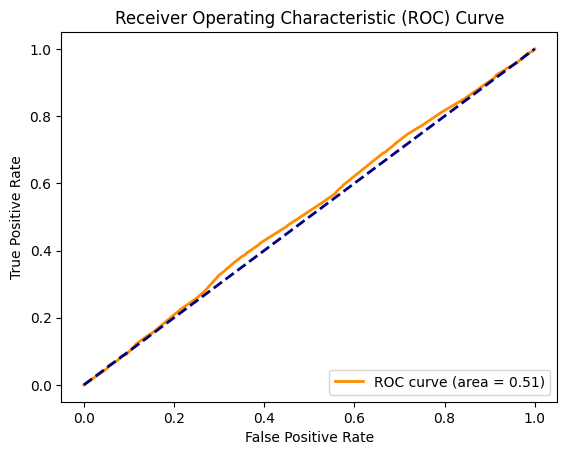

In [79]:
#Plotting the ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

## Trying to improve your model performance by changing the model hyperparameters

In [80]:
#Try to improve your model performance by changing the model hyperparameters


Best parameters found:  {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2}
Best ROC AUC score found:  0.5126947509871597
ROC AUC for the best model: 0.5180


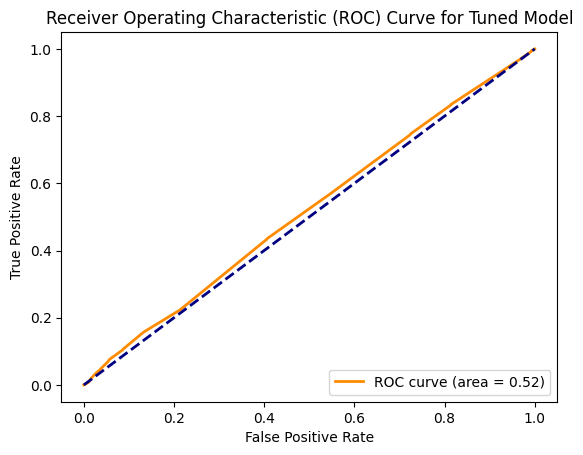

In [81]:
# Using GridsearchCV to find the best hyperparameters
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the parameter grid to search
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Create a Decision Tree Classifier model
dt_model = DecisionTreeClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best parameters found: ", grid_search.best_params_)
print("Best ROC AUC score found: ", grid_search.best_score_)

# Get the best model
best_dt_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred_prob_best = best_dt_model.predict_proba(X_test)[:, 1]
fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_pred_prob_best)
roc_auc_best = auc(fpr_best, tpr_best)

print(f"ROC AUC for the best model: {roc_auc_best:.4f}")

# Plot the ROC Curve for the best model
plt.figure()
plt.plot(fpr_best, tpr_best, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_best)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Tuned Model')
plt.legend(loc="lower right")
plt.show()

Feature ranking:
1. feature Census_OSEdition_ServerStandard (8.8954)
2. feature Census_OSEdition_ProfessionalN (8.4455)
3. feature Census_OSEdition_Core (6.7736)
4. feature OsPlatformSubRelease_rs1 (5.3602)
5. feature Census_HasOpticalDiskDrive (5.1284)
6. feature Census_OSEdition_CoreCountrySpecific (4.3038)
7. feature OsPlatformSubRelease_rs4 (4.3021)
8. feature Census_OSEdition_Education (3.7998)
9. feature Census_OSEdition_EnterpriseSN (3.2075)
10. feature OsPlatformSubRelease_prers5 (3.0365)
11. feature Census_OSEdition_Cloud (2.7344)
12. feature Census_OSEdition_Enterprise (2.1982)
13. feature Census_OSEdition_ProfessionalEducation (1.8576)
14. feature Census_OSEdition_ProfessionalEducationN (1.7628)
15. feature Census_OSEdition_CoreSingleLanguage (1.2598)
16. feature Census_OSEdition_EducationN (1.1400)
17. feature OsPlatformSubRelease_th2 (0.9305)
18. feature Census_OSEdition_ServerDatacenterEval (0.6602)
19. feature OsPlatformSubRelease_windows8.1 (0.5421)
20. feature OsPlatfo

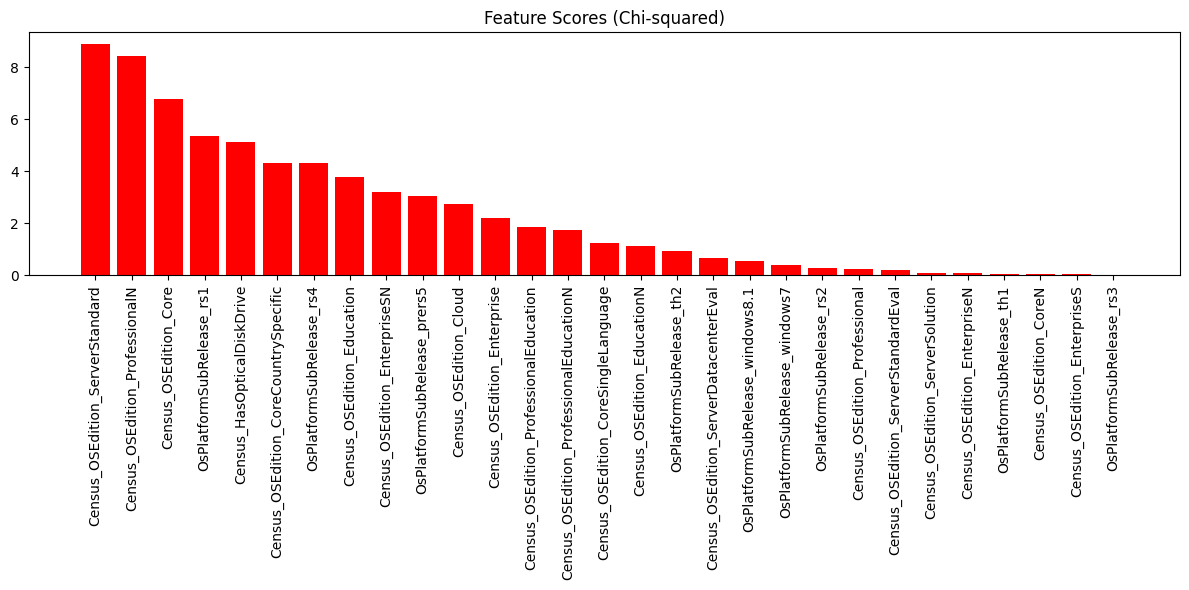

In [82]:
# Trying to find the best X-selected for training the model to improve performance
from sklearn.feature_selection import SelectKBest, chi2
import matplotlib.pyplot as plt
import numpy as np

# Separate features (X) and target (y) - ensure X is non-negative for chi2
# Your data_encoded already has X and y defined, and one-hot encoding results in non-negative values.
# Let's re-use X and y from the previous steps.

# Apply SelectKBest with chi2
# We'll select the top 10 features as an example, you can change k
k_best_features = SelectKBest(score_func=chi2, k=10)
fit = k_best_features.fit(X, y)

# Summarize scores
scores = fit.scores_
features = X.columns
indices = np.argsort(scores)[::-1] # Get indices in descending order of scores

print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f+1}. feature {features[indices[f]]} ({scores[indices[f]]:.4f})")

# Plot feature scores
plt.figure(figsize=(12, 6))
plt.bar(range(X.shape[1]), scores[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.title("Feature Scores (Chi-squared)")
plt.tight_layout()
plt.show()

# # Get the selected features
# X_selected = X.iloc[:, indices[:10]] # Select the top k features

# print("\nShape of original features:", X.shape)
# print("Shape of selected features:", X_selected.shape)

# # Now you can use X_selected for training your model
# # X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)
# # Train your Decision Tree (or other) model on X_train_selected

ROC AUC for the model with selected features: 0.5191


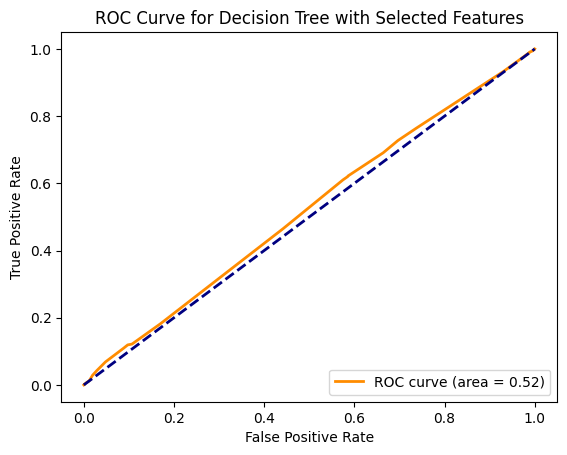

In [83]:
#training the model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Use the selected features X_selected and the target variable y
X_train_selected, X_test_selected, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Train a Decision Tree model on the selected features
model_selected = DecisionTreeClassifier(random_state=42) # You can add hyperparameters here if you want to tune again
model_selected.fit(X_train_selected, y_train)

# Evaluate the model with selected features
y_pred_prob_selected = model_selected.predict_proba(X_test_selected)[:, 1]
fpr_selected, tpr_selected, thresholds_selected = roc_curve(y_test, y_pred_prob_selected)
roc_auc_selected = auc(fpr_selected, tpr_selected)

print(f"ROC AUC for the model with selected features: {roc_auc_selected:.4f}")

# Plot the ROC Curve for the model with selected features
plt.figure()
plt.plot(fpr_selected, tpr_selected, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_selected)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree with Selected Features')
plt.legend(loc="lower right")
plt.show()

## Insights from Decision Tree Model
based on the outcome from the decision tree method all indicating a performance of between 0.50 and 0.50. the findings indicates a potential fail and that Decision tree might not be the best method to capture the relationships of the variables in the dataset and to achieve accurate prediction. we can therefore consider other supervised methods to compare their accuracy.

ROC AUC for the Random Forest model: 0.5157


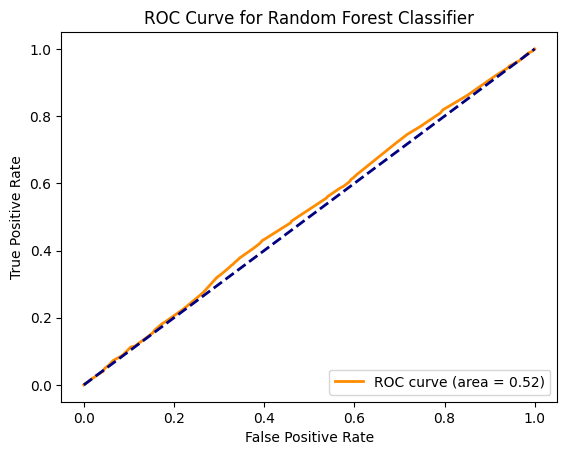

In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Create a Random Forest Classifier model
# You can start with default parameters and tune later if needed
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

print(f"ROC AUC for the Random Forest model: {roc_auc_rf:.4f}")

# Plot the ROC Curve for the Random Forest model
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

#Since the RandomForest Method returns as comparable performance, the model thus did not perform well and can be reevaluated from the initial variables.

## Part2: unsupervised learning

In [85]:
#Dropping out the target variable
features = data.select_dtypes(include=[np.number])


In [86]:
#Applying K means clustering and ploting the clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

#
#scale the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

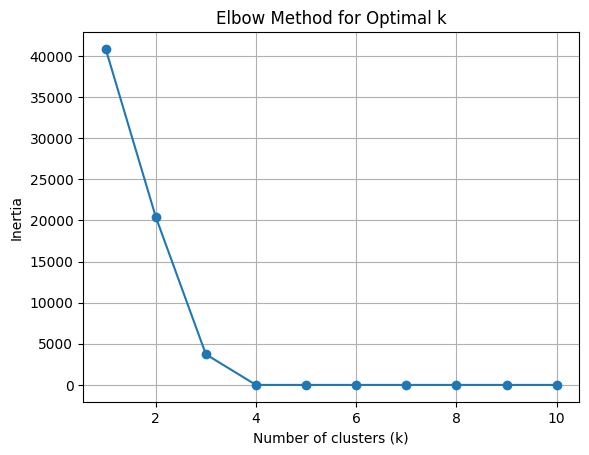

In [87]:
#choosing the number of clusters using the elbow method to detrmine the most optimal k

inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot elbow curve
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()


In [88]:
#the optimal k is 3
#
#fitting Kmeans with the chosen number of clusters
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)


In [96]:
#Analyzing the results
# View cluster assignments
print(data.groupby('Cluster').mean(numeric_only = True))
print(data.groupby('Cluster').count())

# # Visualize (if possible with 2D or PCA)
# plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=data['Cluster'], cmap='viridis')
# plt.title('KMeans Clustering')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.show()


         HasDetections  Census_HasOpticalDiskDrive
Cluster                                           
0             0.487048                         1.0
1             0.000000                         0.0
2             1.000000                         0.0
         HasDetections  Census_OSEdition  Census_HasOpticalDiskDrive  \
Cluster                                                                
0                 3706              3706                        3706   
1                 8952              8952                        8952   
2                 7761              7761                        7761   

         OsPlatformSubRelease  
Cluster                        
0                        3706  
1                        8952  
2                        7761  


In [98]:
from sklearn.metrics import silhouette_score

score = silhouette_score(scaled_features, data['Cluster'])
print(f"Silhouette Score: {score:.2f}")


Silhouette Score: 0.93


## Insights
The silhouette score of 0.93 seems excellent and indicates that the clusters formed by this model are well defined and distinct.